In [12]:
import os # setting the working directory
import time # timing the code execution
import numpy as np # data handling 
import pandas as pd # data handling 
import matplotlib.pyplot as plt # visualization 
from sklearn.metrics import roc_curve, auc # classification accuracy metrics
from sklearn.metrics import confusion_matrix # classificiation accuracy 
from sklearn.metrics import classification_report # classification accuracy 
from sklearn.model_selection import train_test_split, GridSearchCV # Grid Search ---> find the optimal hyperparameters
from sklearn.ensemble import RandomForestClassifier

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import os 
os.chdir(R'C:\Users\dipan\OneDrive\Desktop\BIA_MARRY\Final_projects\Chennai_houseing_sale')
os.getcwd()

'C:\\Users\\dipan\\OneDrive\\Desktop\\BIA_MARRY\\Final_projects\\Chennai_houseing_sale'

In [1]:
df = pd.read_csv('Chennai_houseing_sale_Data.csv')
df.head(5)

NameError: name 'pd' is not defined

In [16]:
data=df.drop("Unnamed: 0", axis = 1 )

KeyError: "['Unnamed: 0'] not found in axis"

In [6]:
data.head(5)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [7]:
data.tail(2)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015
1435,6950,76.0,1,Petrol,110,0.0,0,1600,5,1114


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1436 non-null   object 
 3   FuelType   1336 non-null   object 
 4   HP         1436 non-null   object 
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 112.3+ KB


In [9]:
data.describe()

,Price,Age,MetColor,Automatic,CC,Weight
count,1436.000000,1336.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,0.674961,0.055710,1566.827994,1072.45961
std,3626.964585,18.589804,0.468572,0.229441,187.182436,52.64112
min,4350.000000,1.000000,0.000000,0.000000,1300.000000,1000.00000
25%,8450.000000,43.000000,0.000000,0.000000,1400.000000,1040.00000
50%,9900.000000,60.000000,1.000000,0.000000,1600.000000,1070.00000
75%,11950.000000,70.000000,1.000000,0.000000,1600.000000,1085.00000
max,32500.000000,80.000000,1.000000,1.000000,2000.000000,1615.00000


In [10]:
data.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [11]:
data.shape

(1436, 10)

In [12]:
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015


# 1.Find null/Nan.

In [13]:
data.isnull().sum()

Price          0
Age          100
KM             0
FuelType     100
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

# 2.drop and fill Nan.

In [14]:
import numpy as np
data.replace(('?','??','???','????','/','three'), np.nan, inplace=True)
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,NaN,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,10845,72.0,NaN,Petrol,86,0.0,0,1300,3,1015
1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,7250,70.0,NaN,NaN,86,1.0,0,1300,3,1015


In [15]:
#1.Find null/Nan
data.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          1
Weight         0
dtype: int64

In [16]:
# Convert specific columns to float using pd.to_numeric()
data['KM'] = pd.to_numeric(data['KM'], errors='coerce') # not a flote vale ,we convert float value
data['HP'] = pd.to_numeric(data['HP'], errors='coerce')

In [17]:
print("Here's the data types of our columns:\n",
     data.dtypes)

Here's the data types of our columns:
 Price          int64
Age          float64
KM           float64
FuelType      object
HP           float64
MetColor     float64
Automatic      int64
CC             int64
Doors         object
Weight         int64
dtype: object


In [18]:
# Calculate the mean of each column
mean_values = data.mean()

# Replace null values with the respective column mean
data.fillna(mean_values, inplace=True)


In [20]:
mean_values

Price        10730.824513
Age             55.672156
KM           68647.239972
HP             101.478322
MetColor         0.674961
Automatic        0.055710
CC            1566.827994
Weight        1072.459610
dtype: float64

In [19]:
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.000000,46986.000000,Diesel,90.0,1.000000,0,2000,NaN,1165
1,13750,23.000000,72937.000000,Diesel,90.0,1.000000,0,2000,3,1165
2,13950,24.000000,41711.000000,Diesel,90.0,0.674961,0,2000,3,1165
3,14950,26.000000,48000.000000,Diesel,90.0,0.000000,0,2000,3,1165
4,13750,30.000000,38500.000000,Diesel,90.0,0.000000,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,55.672156,20544.000000,Petrol,86.0,1.000000,0,1300,3,1025
1432,10845,72.000000,68647.239972,Petrol,86.0,0.000000,0,1300,3,1015
1433,8500,55.672156,17016.000000,Petrol,86.0,0.000000,0,1300,3,1015
1434,7250,70.000000,68647.239972,NaN,86.0,1.000000,0,1300,3,1015


In [19]:
data.isnull().sum()

Price          0
Age            0
KM             0
FuelType     100
HP             0
MetColor       0
Automatic      0
CC             0
Doors          1
Weight         0
dtype: int64

In [21]:
data['FuelType'].value_counts()

Petrol    1177
Diesel     144
CNG         15
Name: FuelType, dtype: int64

In [23]:
data.replace(NaN, "Petrol", inplace=False)
data

NameError: name 'NaN' is not defined

In [114]:
#data['FuelType'] = pd.to_numeric(data['FuelType'], errors='coerce')

In [141]:
#data['FuelType'].replace({"NaN" : "Petrol" })

In [149]:
#data['FuelType'].count()

In [143]:
#data['FuelType'].replace({"Diesel" : "0" , "Petrol" : "1","CNG" : "2"})

In [148]:
#data['FuelType'].replace({"NaN" : "1" })

In [144]:
data1 = data.dropna() # d
data1

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1,13750,23.000000,72937.000000,Diesel,90.0,1.000000,0,2000,3,1165
2,13950,24.000000,41711.000000,Diesel,90.0,0.674961,0,2000,3,1165
3,14950,26.000000,48000.000000,Diesel,90.0,0.000000,0,2000,3,1165
4,13750,30.000000,38500.000000,Diesel,90.0,0.000000,0,2000,3,1170
5,12950,32.000000,61000.000000,Diesel,90.0,0.000000,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1430,8450,80.000000,23000.000000,Petrol,86.0,0.000000,0,1300,3,1015
1431,7500,55.672156,20544.000000,Petrol,86.0,1.000000,0,1300,3,1025
1432,10845,72.000000,68647.239972,Petrol,86.0,0.000000,0,1300,3,1015
1433,8500,55.672156,17016.000000,Petrol,86.0,0.000000,0,1300,3,1015


In [145]:
data1.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [147]:
data1.shape

(1335, 10)

# 3.find mean,median,mode.


In [150]:
data1.mean()

Price        10696.899625
Age             55.771918
KM           69135.194277
HP             101.568084
MetColor         0.671756
Automatic        0.054682
CC            1567.540824
Weight        1072.208240
dtype: float64

In [151]:
data1.median()

Price         9900.0
Age             59.0
KM           64280.0
HP             110.0
MetColor         1.0
Automatic        0.0
CC            1600.0
Weight        1070.0
dtype: float64

In [152]:
from scipy import stats

In [156]:
stats.mode(data1)

ModeResult(mode=array([[8950, 55.67215568862275, 68647.23997185081, 'Petrol', 110.0, 1.0,
        0, 1600, '5', 1075]], dtype=object), count=array([[  98,   93,   14, 1177,  777,  805, 1262,  790,  631,  179]]))

In [ ]:
#4.Find all the above for each column

# 5.Find skewness

In [157]:
from scipy.stats import skew

#Distribution on the basis of skewness value:

#Skewness = 0: Then normally distributed.
#Skewness > 0: Then more weight in the left tail of the distribution.
#Skewness < 0: Then more weight in the right tail of the distribution.

In [161]:
# Calculate skewness using pandas
skewness = data1.skew()

In [162]:
print(f"Skewness: {skewness}")

Skewness: Price        1.649476
Age         -0.834712
KM           1.032916
HP           0.922699
MetColor    -0.773376
Automatic    3.921743
CC           0.606025
Weight       3.082378
dtype: float64


In [ ]:
#6.plot with different plots.

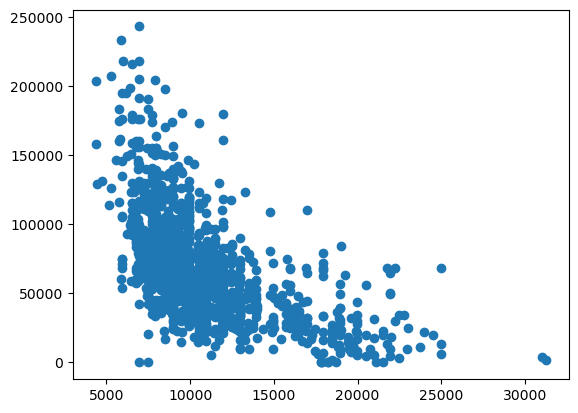

In [165]:
import matplotlib.pyplot as plt

x =data1["Price"]
y =data1["KM"]

plt.scatter(x, y)
plt.show()

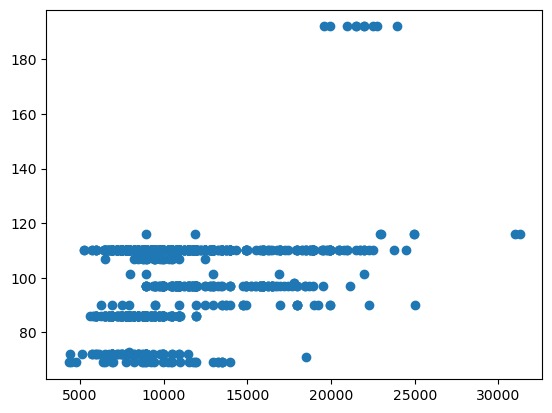

In [166]:
x =data1["Price"]
y =data1["HP"]

plt.scatter(x, y)
plt.show()

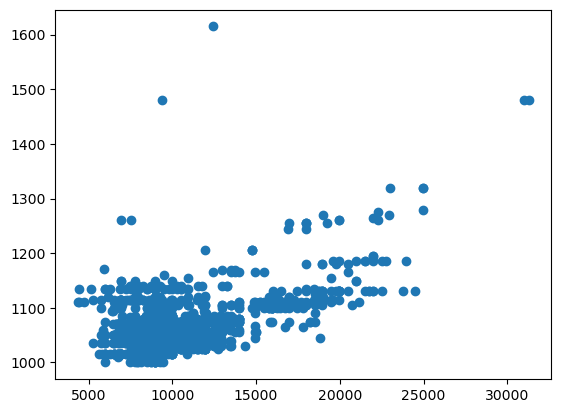

In [167]:
import matplotlib.pyplot as plt

x =data1["Price"]
y =data1["Weight"]

plt.scatter(x, y)
plt.show()